In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotting
from main import *

/Users/fred/anaconda/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [4]:
params = {'DECAY_RATE': .0001,
          'FTP_PREFERENCE': 0.5,
          'CHUNK_THRESHOLD': 0.3}
corpus = syl_corpus()
model, history = train(corpus,
                       utterances=1000,
                       sample_rate=100,
                       model_params=params,
                      )

trained on 1000 utterances
train time : 863.981 seconds


In [11]:
for _ in range(10):
    print(model.parse_utterance(next(corpus)))

([# o] | #)
(# | [st@nd ^p] | #)
([[# yu] w^nt] | [ma miz] | p@k | #)
(# | [p@k #])
([# lEts] | tek | yUr | [pi pxl] | [Wt #])
([# ups] | Y | dId | #)
([# Y] | tUk | cl | yUr | [pi pxl] | [Wt #])
([[# k^m] [an #]])
([# no] | [D@ts e] | kcrd | #)
(# | [k@nt h@v] | D@t | kcrd | #)


In [25]:
for _ in range(10):
    utt = next(corpus)
    print()
    print('ADULT:', ' '.join(utt))
    try:
        print('MODEL:', model.speak(utt))
    except KeyError as e:
        print(e)


ADULT: h^
MODEL: h^

ADULT: yu g^ nx hold w^n
MODEL: [w^n [[yu [g^ nx]] hold]]

ADULT: k^m an
MODEL: [k^m an]

ADULT: k^m an
MODEL: [k^m an]

ADULT: lEts pUt yUr lEgz ^p
MODEL: [^p [[lEgz [pUt yUr]] lEts]]

ADULT: se lEgz ^p
MODEL: [lEgz [se ^p]]

ADULT: hold an
MODEL: [hold an]

ADULT: hold an
MODEL: [hold an]

ADULT: o ke se zum zum
MODEL: [[se [zum zum]] [o ke]]

ADULT: zum zum
MODEL: [zum zum]


In [11]:
sentences = ['Bob ate',
             'Jack ate the hill',
             'Jack ate the hill with my telescope',
             'the boy under the table saw my cookie',
             'my cookie saw Bob under the cookie',
             'the boy with the cookie under the table saw Jack',
             'the boy with the cookie saw the table under the hill',
             'the boy with the cookie saw the table under the hill with my telescope',
            ]
sentences = [s.split() for s in sentences]

print('\nPARSE')
for s in sentences:
    print(model.parse_utterance(s))


PARSE
([[[# Bob] ate] #])
([[[# Jack] ate] [[the hill] #]])
([[[# Jack] ate] [the hill]] | with | [[my telescope] #])
([[[[# the] boy] under] [the table]] | saw | [[my cookie] #])
([[[# my] cookie] saw] | Bob | under | [[the cookie] #])
([[[# the] boy] with] | [the cookie] | under | [the table] | saw | [Jack #])
([[[[# the] boy] with] [the cookie]] | saw | [the table] | under | [[the hill] #])
([[[[# the] boy] with] [the cookie]] | saw | [[the table] under] | [[the hill] with] | [[my telescope] #])


In [12]:
print('\nSPEAK')
for s in sentences:
    print(model.speak(s))


SPEAK
[Bob ate]
[[Jack ate] [the hill]]
[[my telescope] [[with [Jack ate]] [the hill]]]
[[[the boy] saw] [[[the table] under] [my cookie]]]
[[the cookie] [[[my cookie] saw] [Bob under]]]
[[[[Jack with] [the cookie]] [[the boy] saw]] [[the table] under]]
[[[with [the hill]] [[the boy] saw]] [[[the table] under] [the cookie]]]
[[[the boy] saw] [[[with [the hill]] [with [the telescope]]] [[[the table] under] [my cookie]]]]


/Users/fred/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


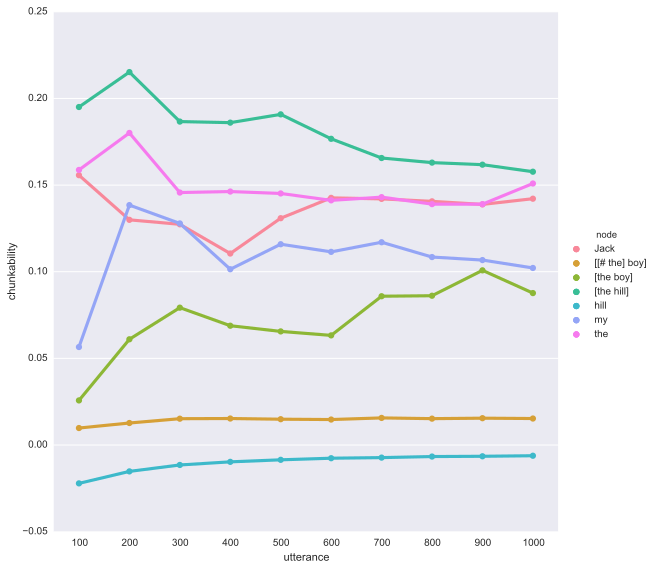

In [13]:
# mdf = node_frame(history, 'the', ['table', 'telescope', 'boy', 'hill',
#                                   'Jack', 'ate'])

mdf = node_frame(history, 'ate', ['the', 'my', 'Jack', 'hill', '[the hill]', '[the boy]', '[[# the] boy]'])

sns.factorplot('utterance', 'chunkability', hue='node', data=mdf,
               markers='.', size=8,)

In [9]:
plotting.heatmap(history[100], figsize=(7,7))

/Users/fred/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


KeyboardInterrupt: 